In [6]:
!pip install keras

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv1D, MaxPooling1D, LSTM
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# 以下ライブラリ読み込み...

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Udemy_TimeAnalysis/energydata_complete.csv')

In [9]:
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date").resample("H").mean()

/tmp/ipython-input-2253676773.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.set_index("date").resample("H").mean()


In [10]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,55.000000,35.000000,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,...,17.016667,45.446667,6.308333,733.750000,92.000000,6.166667,53.416667,5.050000,26.823044,26.823044
2016-01-11 18:00:00,176.666667,51.666667,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,...,16.981667,45.290000,5.941667,734.266667,91.583333,5.416667,40.000000,4.658333,22.324206,22.324206
2016-01-11 19:00:00,173.333333,25.000000,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,...,16.902222,45.311389,6.000000,734.791667,89.750000,6.000000,40.000000,4.391667,33.734932,33.734932
2016-01-11 20:00:00,125.000000,35.000000,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,...,16.890000,45.118889,6.000000,735.283333,87.583333,6.000000,40.000000,4.016667,25.679642,25.679642
2016-01-11 21:00:00,103.333333,23.333333,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,...,16.890000,44.807778,5.833333,735.566667,87.416667,6.000000,40.000000,3.816667,18.826274,18.826274


In [11]:
df = df.loc["2016-01-12":"2016-05-25", :]

In [12]:
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-12 00:00:00,141.666667,16.666667,21.266111,44.960556,20.637222,44.018333,20.144444,45.542222,20.514444,47.112778,...,16.890000,45.875000,5.216667,737.150000,92.000000,6.000000,29.500000,4.016667,26.296718,26.296718
2016-01-12 01:00:00,168.333333,8.333333,20.963611,45.613194,20.333333,44.273333,20.133333,45.540000,21.505556,46.946667,...,16.890000,46.307778,5.141667,737.833333,92.000000,5.583333,40.000000,3.941667,28.723073,28.723073
2016-01-12 02:00:00,45.000000,0.000000,20.696667,46.197778,20.066667,44.503333,20.170833,45.454167,21.143056,45.905556,...,16.975556,47.263333,5.033333,738.550000,92.000000,4.583333,40.000000,3.833333,17.282387,17.282387
2016-01-12 03:00:00,35.000000,0.000000,20.462222,46.240000,19.792222,44.560000,20.230000,45.427778,20.416667,46.108889,...,17.022222,48.083333,4.841667,739.191667,92.416667,4.833333,40.000000,3.683333,24.223558,24.223558
2016-01-12 04:00:00,45.000000,0.000000,20.229444,46.483611,19.600000,44.651111,20.285000,45.525000,19.951111,46.396667,...,17.055556,48.827500,4.941667,739.725000,92.166667,5.583333,40.000000,3.716667,28.191145,28.191145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-25 19:00:00,118.333333,0.000000,24.447403,37.297468,23.623734,34.920130,24.849351,36.625325,24.237403,38.034416,...,22.100000,38.101840,16.316667,756.100000,55.833333,1.583333,33.583333,7.366667,32.968599,32.968599
2016-05-25 20:00:00,190.000000,1.666667,24.377273,37.694091,23.522045,35.613636,24.861818,36.859091,24.167273,38.213636,...,22.100000,38.606515,15.741667,756.183333,59.916667,1.416667,34.166667,7.933333,34.942931,34.942931
2016-05-25 21:00:00,56.666667,3.333333,24.307143,38.090714,23.420357,36.307143,24.874286,37.092857,24.097143,38.392857,...,22.100000,39.111190,14.266667,756.425000,68.583333,1.583333,31.833333,8.566667,33.016733,33.016733


In [13]:
cols = ["Appliances", "RH_out"]
df = df[cols]
df

,Appliances,RH_out
date,,
2016-01-12 00:00:00,141.666667,92.000000
2016-01-12 01:00:00,168.333333,92.000000
2016-01-12 02:00:00,45.000000,92.000000
2016-01-12 03:00:00,35.000000,92.416667
2016-01-12 04:00:00,45.000000,92.166667
...,...,...
2016-05-25 19:00:00,118.333333,55.833333
2016-05-25 20:00:00,190.000000,59.916667
2016-05-25 21:00:00,56.666667,68.583333


In [14]:
rh_min = df["RH_out"].min()
rh_max = df["RH_out"].max()

ap_min = df["Appliances"].min()
ap_max = df["Appliances"].max()



In [15]:
print(rh_min, rh_max)
print(ap_min, ap_max)

25.25 100.0
28.333333333333332 608.3333333333334


In [16]:
df["RH_out_scaled"] = (df["RH_out"] - rh_min) / (rh_max - rh_min)
df["Appliances_scaled"] = (df["Appliances"] - ap_min) / (ap_max - ap_min)

df = df[["RH_out_scaled","Appliances_scaled"]]
df

/tmp/ipython-input-2920142531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["RH_out_scaled"] = (df["RH_out"] - rh_min) / (rh_max - rh_min)
/tmp/ipython-input-2920142531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Appliances_scaled"] = (df["Appliances"] - ap_min) / (ap_max - ap_min)


,RH_out_scaled,Appliances_scaled
date,,
2016-01-12 00:00:00,0.892977,0.195402
2016-01-12 01:00:00,0.892977,0.241379
2016-01-12 02:00:00,0.892977,0.028736
2016-01-12 03:00:00,0.898551,0.011494
2016-01-12 04:00:00,0.895206,0.028736
...,...,...
2016-05-25 19:00:00,0.409142,0.155172
2016-05-25 20:00:00,0.463768,0.278736
2016-05-25 21:00:00,0.579710,0.048851


In [17]:
df.describe()

,RH_out_scaled,Appliances_scaled
count,3240.000000,3240.000000
mean,0.729774,0.118440
std,0.197765,0.138711
min,0.000000,0.000000
25%,0.606187,0.037356
50%,0.782609,0.057471
75%,0.887402,0.140805
max,1.000000,1.000000


In [18]:
df_train = df.loc[:"2016-04-30",:]
df_test = df.loc["2016-05-01":,:]
df_train.head()

,RH_out_scaled,Appliances_scaled
date,,
2016-01-12 00:00:00,0.892977,0.195402
2016-01-12 01:00:00,0.892977,0.241379
2016-01-12 02:00:00,0.892977,0.028736
2016-01-12 03:00:00,0.898551,0.011494
2016-01-12 04:00:00,0.895206,0.028736


In [19]:
df_test

,RH_out_scaled,Appliances_scaled
date,,
2016-05-01 00:00:00,0.823857,0.040230
2016-05-01 01:00:00,0.850613,0.045977
2016-05-01 02:00:00,0.877369,0.034483
2016-05-01 03:00:00,0.898551,0.022989
2016-05-01 04:00:00,0.923077,0.043103
...,...,...
2016-05-25 19:00:00,0.409142,0.155172
2016-05-25 20:00:00,0.463768,0.278736
2016-05-25 21:00:00,0.579710,0.048851


In [20]:
df_train

,RH_out_scaled,Appliances_scaled
date,,
2016-01-12 00:00:00,0.892977,0.195402
2016-01-12 01:00:00,0.892977,0.241379
2016-01-12 02:00:00,0.892977,0.028736
2016-01-12 03:00:00,0.898551,0.011494
2016-01-12 04:00:00,0.895206,0.028736
...,...,...
2016-04-30 19:00:00,0.558528,0.054598
2016-04-30 20:00:00,0.569677,0.074713
2016-04-30 21:00:00,0.618729,0.071839


# 学習用データ作成


*   n_steps_in : 7*24
*   n_steps_put: 24

各行に対して24行飛ばしでforループを回し、その行からn_steps_in個のデータ説明変数X、さらにn_steps_out個データを目的変数yとして、numpy arrayで出力する。


In [21]:
def make_sequences(sequences, n_steps_in, n_steps_out):
    X, y = [], []

    for i in range(0, len(sequences), 24):

        in_end = i + n_steps_in
        out_end = in_end + n_steps_out

        # データ不足なら終了
        if out_end > len(sequences):
            break

        x_seq = sequences[i:in_end, :]
        y_seq = sequences[in_end:out_end, -1]

        X.append(x_seq)
        y.append(y_seq)

    return np.array(X), np.array(y)


In [22]:
dataset_train = df_train.dropna().values
dataset_test = df_test.dropna().values
n_steps_in = 24*7
n_steps_out = 24

X_train, y_train = make_sequences(dataset_train, n_steps_in, n_steps_out)
X_test, y_test = make_sequences(dataset_test, n_steps_in, n_steps_out)

In [23]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(103, 168, 2)
(103, 24)
(18, 168, 2)
(18, 24)


In [24]:
n_features = X_train.shape[2]
n_timesteps = X_train.shape[1]
n_outputs = y_train.shape[1]

# CNN

In [25]:
model = Sequential()
model.add(Conv1D(filters = 32, kernel_size = 2, activation = 'relu', input_shape = (n_steps_in, n_features)))
model.add(Conv1D(filters = 32, kernel_size = 2, activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs))
model.compile(loss='mse', optimizer=Adam(learning_rate = 0.01))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
epoch = 10
val_split_rate = 0.2
batch_size = 32

history = model.fit(
    X_train
    , y_train
    , epochs = epoch
    , batch_size = batch_size
    , validation_split = val_split_rate
    , verbose = 1
)

print(model.summary())

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 394ms/step - loss: 0.4257 - val_loss: 0.0384
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - loss: 0.0395 - val_loss: 0.0283
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0272 - val_loss: 0.0208
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0227 - val_loss: 0.0174
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.0161 - val_loss: 0.0162
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - loss: 0.0166 - val_loss: 0.0160
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0167 - val_loss: 0.0153
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.0157 - val_loss: 0.0149
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.0163 - val_loss: 0.0153
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - loss: 0.0170 - val_loss: 0.0148


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 167, 32)        │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 166, 32)        │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 166, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 83, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2656)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       265,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         2,424 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 811,094 (3.09 MB)

 Trainable params: 270,364 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 540,730 (2.06 MB)

None


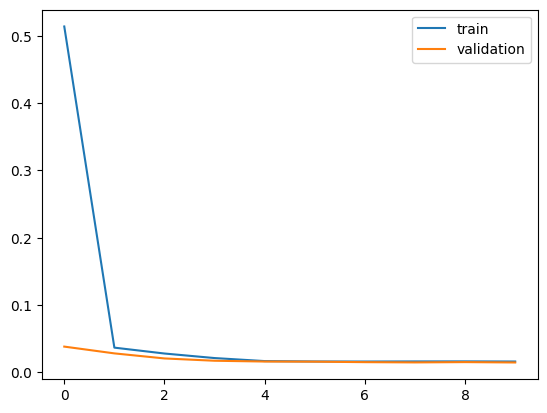

In [27]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "validation")
plt.legend()

In [28]:
pred = model.predict(X_test)
pred_ = pred.ravel().tolist()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


In [29]:
pred_

[0.04424459487199783,
 0.01888766512274742,
 0.022995971143245697,
 0.04084254056215286,
 0.016180116683244705,
 0.040435172617435455,
 0.013975068926811218,
 0.04319455474615097,
 0.12400130927562714,
 0.1275574266910553,
 0.13665811717510223,
 0.1776924729347229,
 0.1510249227285385,
 0.1979491412639618,
 0.1149807944893837,
 0.1263830065727234,
 0.14593786001205444,
 0.18156395852565765,
 0.2641424238681793,
 0.20216257870197296,
 0.14281988143920898,
 0.11002591997385025,
 0.07547035813331604,
 0.044969260692596436,
 0.04469650238752365,
 0.016587983816862106,
 0.02221389301121235,
 0.04030045494437218,
 0.016243476420640945,
 0.03880660980939865,
 0.012292997911572456,
 0.042115237563848495,
 0.12411727011203766,
 0.1270459145307541,
 0.1344040483236313,
 0.17528191208839417,
 0.14866824448108673,
 0.19574697315692902,
 0.11464902758598328,
 0.12547554075717926,
 0.14706964790821075,
 0.17948950827121735,
 0.2622123658657074,
 0.20223182439804077,
 0.14052259922027588,
 0.10915958

In [30]:
y_test_ = y_test.ravel().tolist()

In [31]:
result_df = pd.DataFrame(data=pd.concat([pd.Series(y_test_), pd.Series(pred_)], axis=1))
result_df.columns = ["y_scaled", "pred_scaled"]
result_df

,y_scaled,pred_scaled
0,0.051724,0.044245
1,0.040230,0.018888
2,0.045977,0.022996
3,0.048851,0.040843
4,0.037356,0.016180
...,...,...
427,0.155172,0.202744
428,0.278736,0.139518
429,0.048851,0.107595
430,0.043103,0.075201


In [32]:
result_df["y_original"] = result_df["y_scaled"] * (ap_max-ap_min) + ap_min
result_df["pred_original"] = result_df["pred_scaled"] * (ap_max-ap_min) + ap_min
result_df

,y_scaled,pred_scaled,y_original,pred_original
0,0.051724,0.044245,58.333333,53.995198
1,0.040230,0.018888,51.666667,39.288179
2,0.045977,0.022996,55.000000,41.670997
3,0.048851,0.040843,56.666667,52.022007
4,0.037356,0.016180,50.000000,37.717801
...,...,...,...,...
427,0.155172,0.202744,118.333333,145.925013
428,0.278736,0.139518,190.000000,109.253838
429,0.048851,0.107595,56.666667,90.738380
430,0.043103,0.075201,53.333333,71.950158


<Axes: >

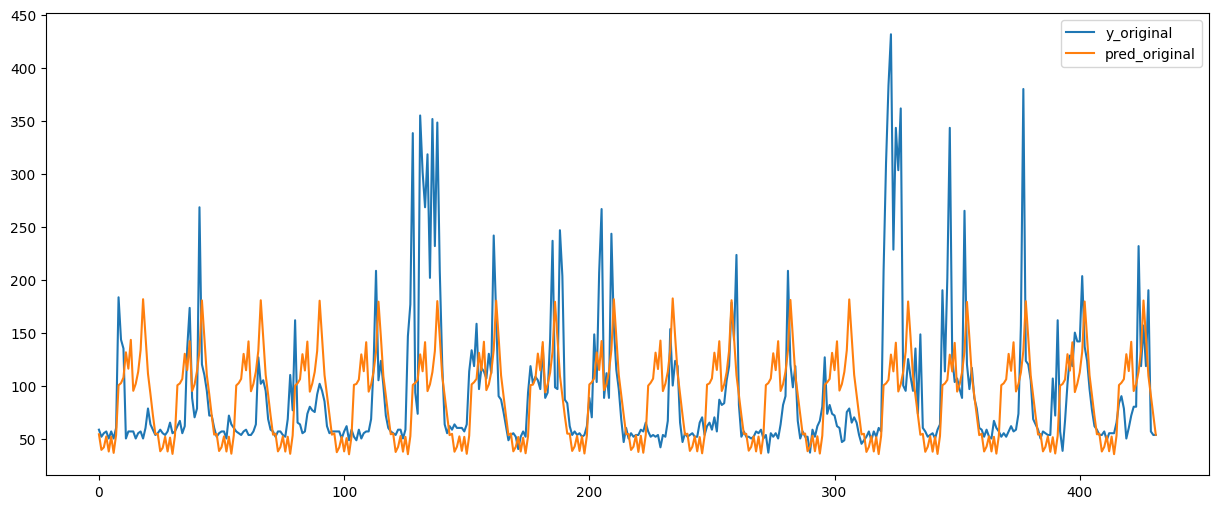

In [33]:
result_df[["y_original", "pred_original"]].plot(figsize=(15,6))

In [34]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(result_df["y_original"], result_df["pred_original"]))
print("RMSE:{:.2f}".format(rmse))

RMSE:59.90


# LSTM

In [35]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape=(n_steps_in, n_features)))
model.add(Dense(n_steps_out))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.fit(X_train, y_train, epochs = 10, verbose=1)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - loss: 0.0338
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - loss: 0.0259
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - loss: 0.0206
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - loss: 0.0168
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step - loss: 0.0171
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - loss: 0.0167
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 335ms/step - loss: 0.0155
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - loss: 0.0165
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0158
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0148


In [36]:
pred = model.predict(X_test)
pred_ = pred.ravel().tolist()
y_test_ = y_test.ravel().tolist()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


In [37]:
result_df = pd.DataFrame(data=pd.concat([pd.Series(y_test_), pd.Series(pred_)], axis=1))
result_df.columns = ["y_scaled", "pred_scaled"]
result_df["y_original"] = result_df["y_scaled"] * (ap_max - ap_min) + ap_min
result_df["pred_original"] = result_df["pred_scaled"] * (ap_max - ap_min) + ap_min
result_df

,y_scaled,pred_scaled,y_original,pred_original
0,0.051724,-0.004696,58.333333,25.609814
1,0.040230,0.029968,51.666667,45.714956
2,0.045977,0.011827,55.000000,35.192890
3,0.048851,0.018063,56.666667,38.809941
4,0.037356,0.024061,50.000000,42.288947
...,...,...,...,...
427,0.155172,0.181800,118.333333,133.777087
428,0.278736,0.148771,190.000000,114.620446
429,0.048851,0.124268,56.666667,100.408943
430,0.043103,0.079094,53.333333,74.207659


<Axes: >

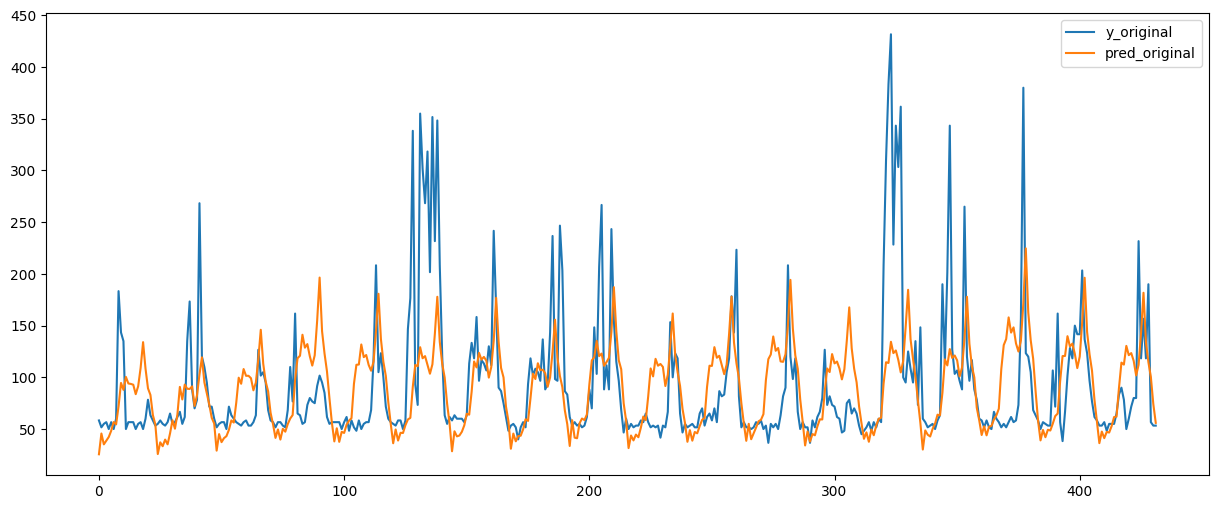

In [38]:
result_df[["y_original", "pred_original"]].plot(figsize=(15, 6))

In [39]:
rmse = np.sqrt(mean_squared_error(result_df["y_original"], result_df["pred_original"]))
print("RMSE:{:.2f}".format(rmse))

RMSE:58.78
